# Project 3: Collaboration Competition

## Initialize Libraries

In [1]:
from unityagents import UnityEnvironment
from maddpg_agents import Group
from collections import deque
import numpy as np
import random
import torch
import matplotlib.pyplot as plt

INFO:matplotlib.font_manager:Could not open font file /usr/share/fonts/truetype/noto/NotoColorEmoji.ttf


In [2]:
tennis = UnityEnvironment(file_name='./Tennis_Linux/Tennis.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
brain_name = tennis.brain_names[0]
brain = tennis.brains[brain_name]

In [4]:
tennis_info = tennis.reset(train_mode=True)[brain_name]
num_agents = len(tennis_info.agents)
action_size = brain.vector_action_space_size
state_size = tennis_info.vector_observations.shape[1]

In [5]:
multi_agent = Group(num_agents,state_size,action_size,7)

In [6]:
def tennis_play(episodes):
    done2 = False
    score1 = []
    score2 = deque(maxlen=100)
    
    for episode in range(0, episodes):
        tennis_info = tennis.reset(train_mode=True)[brain_name]
        current_state = tennis_info.vector_observations
        episode_scores = np.zeros(num_agents)

        while True:
            multi_agent.reset_noise()
            actions = multi_agent.act(current_state)
            tennis_info = tennis.step(actions)[brain_name]
            next_state = tennis_info.vector_observations
            rewards = tennis_info.rewards
            done = tennis_info.local_done
            
            multi_agent.step(current_state, actions, rewards, next_state, done)
            
            current_state = next_state
            episode_scores = episode_scores + np.array(rewards)
            if np.any(done):
                break 
        
        score = episode_scores.max()
        score1.append(score)
        score2.append(score)
        if episode % 100 == 0:
            print("Not done", episode+1, np.mean(score2))      # Keep printing
        if np.mean(score2)>=0.5 and not done2:
            done2 = True
            print("Done !!!", episode+1, np.mean(score2))
            torch.save(multi_agent.checkpoint(), f'checkpoint_multi_agent_0.pth')
            
    return score1

In [7]:
scores_final = tennis_play(3000)

/home/keval/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Not done 1 0.0
Not done 101 0.0010000000149011613
Not done 201 0.011700000185519456
Not done 301 0.017400000318884848
Not done 401 0.02280000038444996
Not done 501 0.009900000188499689
Not done 601 0.0
Not done 701 0.01790000032633543
Not done 801 0.032900000531226395
Not done 901 0.038200000673532485
Not done 1001 0.04660000070929527
Not done 1101 0.0886000013537705
Not done 1201 0.12180000185966491
Not done 1301 0.17780000273138286
Not done 1401 0.1685000026039779
Not done 1501 0.4391000066138804
Done !!! 1514 0.5043000075779855
Not done 1601 0.3451000051759183
Not done 1701 0.12540000196546316
Not done 1801 0.12410000192001462
Not done 1901 0.16480000250041485
Not done 2001 0.3786000056564808
Not done 2101 0.8778000131249428
Not done 2201 0.2937000044621527
Not done 2301 0.6183000092767179
Not done 2401 0.14760000232607126
Not done 2501 0.4618000069260597
Not done 2601 0.7008000104501844
Not done 2701 0.27700000412762166
Not done 2801 0.6668000099435448
Not done 2901 0.7880000117421

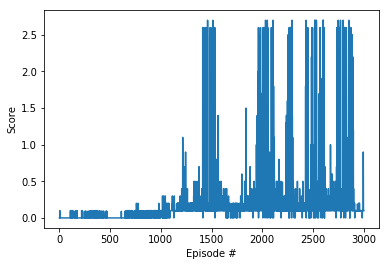

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores_final)+1), scores_final)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()